In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Global Electricity Statistics.csv')
df

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Trinidad and Tobago,distribution losses,Central & South America,0.244,0.21,0.152,0.326,0.36,0.407,0.337,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,distribution losses,Central & South America,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,distribution losses,Central & South America,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,distribution losses,Central & South America,0.55,0.426,0.627,0.662,0.78,0.702,0.911,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


## DATA PREPARATION

In [3]:
table = df.melt(id_vars=['Country', 'Features', 'Region'], 
                                  var_name='Year', 
                                  value_name='Value')

In [4]:
table

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683
1,Angola,net generation,Africa,1980,0.905
2,Benin,net generation,Africa,1980,0.005
3,Botswana,net generation,Africa,1980,0.443
4,Burkina Faso,net generation,Africa,1980,0.098
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.01277172
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [5]:
table[['Value']] = table[['Value']].apply(pd.to_numeric, errors='coerce')

## AFGHANISTAN

In [6]:
# table.columns = table.columns.str.strip()
afghanistan_data = table[table['Country'].str.strip() == 'Afghanistan']
afghanistan_data

,Country,Features,Region,Year,Value
115,Afghanistan,net generation,Asia & Oceania,1980,0.942000
345,Afghanistan,net consumption,Asia & Oceania,1980,0.876060
575,Afghanistan,imports,Asia & Oceania,1980,0.000000
805,Afghanistan,exports,Asia & Oceania,1980,0.000000
1035,Afghanistan,net imports,Asia & Oceania,1980,0.000000
...,...,...,...,...,...
66585,Afghanistan,imports,Asia & Oceania,2021,5.368357
66815,Afghanistan,exports,Asia & Oceania,2021,0.000000
67045,Afghanistan,net imports,Asia & Oceania,2021,5.368357
67275,Afghanistan,installed capacity,Asia & Oceania,2021,0.776400


In [7]:
afghanistan_data = afghanistan_data.groupby(['Country','Year'],)[['Value']].mean()
afghanistan_data

Value
Country     Year          
Afghanistan 1980  0.322571
            1981  0.344429
            1982  0.333000
            1983  0.350000
            1984  0.355429
            1985  0.362571
            1986  0.391429
            1987  0.417857
            1988  0.378429
            1989  0.381714
            1990  0.384286
            1991  0.406714
            1992  0.322429
            1993  0.306857
            1994  0.316571
            1995  0.295714
            1996  0.274286
            1997  0.255714
            1998  0.244571
            1999  0.214571
            2000  0.234429
            2001  0.283143
            2002  0.309286
            2003  0.381000
            2004  0.368143
            2005  0.386714
            2006  0.497714
            2007  0.604714
            2008  0.604727
            2009  0.847896
            2010  1.026110
            2011  1.264539
            2012  1.652014
            2013  1.950414
            2014  2.004871
            2015  2.041500
            2016  2.294643
            2017  2.428403
            2018  2.579323
            2019  2.522540
            2020  2.549514
            2021  2.648523

## TAIWAN

In [8]:
taiwan_data = table[table['Country'].str.strip() == 'Taiwan']
taiwan_data

,Country,Features,Region,Year,Value
155,Taiwan,net generation,Asia & Oceania,1980,42.013000
385,Taiwan,net consumption,Asia & Oceania,1980,39.227000
615,Taiwan,imports,Asia & Oceania,1980,0.000000
845,Taiwan,exports,Asia & Oceania,1980,0.000000
1075,Taiwan,net imports,Asia & Oceania,1980,0.000000
...,...,...,...,...,...
66625,Taiwan,imports,Asia & Oceania,2021,0.000000
66855,Taiwan,exports,Asia & Oceania,2021,0.000000
67085,Taiwan,net imports,Asia & Oceania,2021,0.000000
67315,Taiwan,installed capacity,Asia & Oceania,2021,59.371930


In [30]:
taiwan_data = taiwan_data.groupby(['Country','Year'],)[['Value']].mean()
taiwan_data

Value
Country Year           
Taiwan  1980  13.376571
        1981  13.352143
        1982  14.208275
        1983  15.680580
        1984  17.003129
        1985  17.915114
        1986  19.792181
        1987  21.637979
        1988  23.757869
        1989  25.898546
        1990  27.776598
        1991  30.603072
        1992  32.542040
        1993  35.042239
        1994  37.218675
        1995  39.676133
        1996  42.332782
        1997  45.062195
        1998  48.834116
        1999  50.976856
        2000  56.414162
        2001  57.489451
        2002  60.888650
        2003  63.995224
        2004  67.186739
        2005  69.855751
        2006  72.386695
        2007  74.740491
        2008  73.581774
        2009  71.426087
        2010  76.537588
        2011  78.015512
        2012  77.523354
        2013  78.046363
        2014  80.143069
        2015  79.642609
        2016  81.458821
        2017  83.063248
        2018  85.063676
        2019  85.220443
        2020  87.127203
        2021  90.470943

## ALGERIA

In [10]:
algeria_data = table[table['Country'].str.strip() == 'Algeria']
algeria_data

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
230,Algeria,net consumption,Africa,1980,5.915000
460,Algeria,imports,Africa,1980,0.070000
690,Algeria,exports,Africa,1980,0.061000
920,Algeria,net imports,Africa,1980,0.009000
...,...,...,...,...,...
66470,Algeria,imports,Africa,2021,0.501935
66700,Algeria,exports,Africa,2021,0.598533
66930,Algeria,net imports,Africa,2021,-0.096599
67160,Algeria,installed capacity,Africa,2021,21.694000


In [11]:
algeria_data = algeria_data.groupby(['Country','Year'],)[['Value']].mean()
algeria_data

Value
Country Year           
Algeria 1980   2.260143
        1981   2.618857
        1982   2.998429
        1983   3.266571
        1984   3.575000
        1985   3.868429
        1986   4.076714
        1987   4.307714
        1988   4.743857
        1989   4.842571
        1990   5.037000
        1991   5.373714
        1992   5.583000
        1993   5.914143
        1994   6.060429
        1995   6.048714
        1996   6.388571
        1997   6.591571
        1998   7.082571
        1999   7.549714
        2000   7.801149
        2001   8.102183
        2002   8.467154
        2003   8.988754
        2004   9.494446
        2005  10.302257
        2006  10.713149
        2007  11.235657
        2008  12.043520
        2009  12.052429
        2010  14.104157
        2011  15.567237
        2012  17.545014
        2013  18.307543
        2014  19.694220
        2015  21.096126
        2016  21.836011
        2017  23.331989
        2018  23.763866
        2019  25.140714
        2020  24.018689
        2021  25.380389

## BENIN

In [12]:
benin_data = table[table['Country'].str.strip() == 'Benin']
benin_data

,Country,Features,Region,Year,Value
2,Benin,net generation,Africa,1980,0.005000
232,Benin,net consumption,Africa,1980,0.101000
462,Benin,imports,Africa,1980,0.117000
692,Benin,exports,Africa,1980,0.000000
922,Benin,net imports,Africa,1980,0.117000
...,...,...,...,...,...
66472,Benin,imports,Africa,2021,0.646000
66702,Benin,exports,Africa,2021,0.002000
66932,Benin,net imports,Africa,2021,0.644000
67162,Benin,installed capacity,Africa,2021,0.474900


In [13]:
benin_data = benin_data.groupby(['Country','Year'],)[['Value']].mean()
benin_data

Value
Country Year          
Benin   1980  0.053714
        1981  0.061857
        1982  0.074714
        1983  0.081571
        1984  0.072143
        1985  0.075143
        1986  0.074286
        1987  0.080714
        1988  0.081143
        1989  0.087571
        1990  0.093286
        1991  0.100143
        1992  0.115429
        1993  0.116571
        1994  0.126000
        1995  0.126143
        1996  0.141057
        1997  0.141914
        1998  0.138057
        1999  0.160057
        2000  0.193309
        2001  0.210617
        2002  0.217097
        2003  0.257234
        2004  0.282343
        2005  0.296754
        2006  0.306571
        2007  0.319851
        2008  0.373697
        2009  0.434537
        2010  0.491046
        2011  0.490697
        2012  0.513749
        2013  0.521280
        2014  0.506903
        2015  0.587331
        2016  0.590711
        2017  0.614980
        2018  0.658283
        2019  0.593614
        2020  0.409009
        2021  0.413299

## Botswana

In [14]:
Botswana_data = table[table['Country'].str.strip() == 'Botswana']
Botswana_data

,Country,Features,Region,Year,Value
3,Botswana,net generation,Africa,1980,0.44300
233,Botswana,net consumption,Africa,1980,0.41199
463,Botswana,imports,Africa,1980,0.00000
693,Botswana,exports,Africa,1980,0.00000
923,Botswana,net imports,Africa,1980,0.00000
...,...,...,...,...,...
66473,Botswana,imports,Africa,2021,1.83769
66703,Botswana,exports,Africa,2021,0.00000
66933,Botswana,net imports,Africa,2021,1.83769
67163,Botswana,installed capacity,Africa,2021,0.76600


In [15]:
Botswana_data = Botswana_data.groupby(['Country','Year'],)[['Value']].mean()
Botswana_data

Value
Country  Year          
Botswana 1980  0.145571
         1981  0.166714
         1982  0.196571
         1983  0.214571
         1984  0.225429
         1985  0.252143
         1986  0.282857
         1987  0.298857
         1988  0.285714
         1989  0.286571
         1990  0.310429
         1991  0.327571
         1992  0.376143
         1993  0.392571
         1994  0.462143
         1995  0.475857
         1996  0.541429
         1997  0.600143
         1998  0.607286
         1999  0.681143
         2000  0.695766
         2001  0.797114
         2002  0.890783
         2003  1.016446
         2004  1.048794
         2005  1.098137
         2006  1.177857
         2007  1.263571
         2008  1.345714
         2009  1.335000
         2010  1.443880
         2011  1.495391
         2012  1.518429
         2013  1.564051
         2014  1.432366
         2015  1.515440
         2016  1.518954
         2017  1.472371
         2018  1.472697
         2019  1.728359
         2020  1.483136
         2021  1.520538

## GRAPH

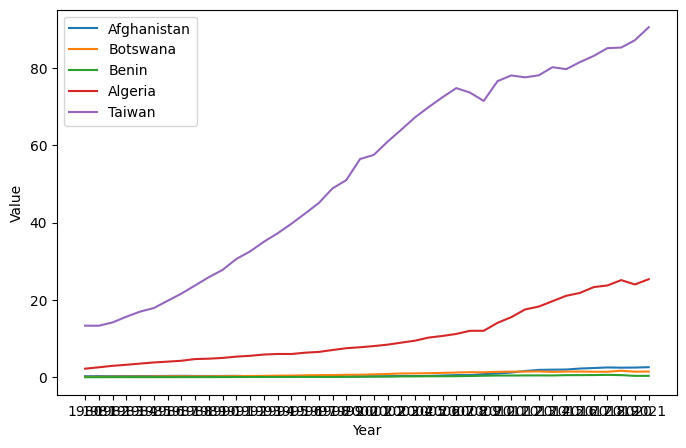

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(data=afghanistan_data,x='Year',y='Value',label='Afghanistan')
sns.lineplot(data=Botswana_data,x='Year',y='Value',label='Botswana')
sns.lineplot(data=benin_data,x='Year',y='Value',label='Benin')
sns.lineplot(data=algeria_data,x='Year',y='Value',label='Algeria')
sns.lineplot(data=taiwan_data,x='Year',y='Value',label='Taiwan')
plt.legend()
plt.show()

In [17]:
table[['Value']] = table[['Value']].apply(pd.to_numeric, errors='coerce')

table

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
1,Angola,net generation,Africa,1980,0.905000
2,Benin,net generation,Africa,1980,0.005000
3,Botswana,net generation,Africa,1980,0.443000
4,Burkina Faso,net generation,Africa,1980,0.098000
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.012772
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051000
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [18]:
table.columns = table.columns.str.strip()
afghanistan_data = table[table['Country'] == 'Afghanistan']
afghanistan_data

,Country,Features,Region,Year,Value


In [19]:
short = table.groupby(['Country','Year'],)[['Value']].mean()
short


Value
Country     Year          
Afghanistan 1980  0.322571
            1981  0.344429
            1982  0.333000
            1983  0.350000
            1984  0.355429
...                    ...
Zimbabwe    2017  3.480882
            2018  3.457087
            2019  3.322097
            2020  3.474003
            2021  3.505650

[9660 rows x 1 columns]

In [20]:
short.to_dict(orient="records")

[{'Value': 0.32257142857142856},
 {'Value': 0.3444285714285714},
 {'Value': 0.333},
 {'Value': 0.35000000000000003},
 {'Value': 0.3554285714285714},
 {'Value': 0.3625714285714286},
 {'Value': 0.3914285714285714},
 {'Value': 0.4178571428571428},
 {'Value': 0.37842857142857145},
 {'Value': 0.3817142857142857},
 {'Value': 0.3842857142857143},
 {'Value': 0.4067142857142857},
 {'Value': 0.32242857142857145},
 {'Value': 0.3068571428571429},
 {'Value': 0.3165714285714286},
 {'Value': 0.2957142857142857},
 {'Value': 0.2742857142857143},
 {'Value': 0.2557142857142857},
 {'Value': 0.24457142857142858},
 {'Value': 0.21457142857142858},
 {'Value': 0.23442857142857143},
 {'Value': 0.28314285714285714},
 {'Value': 0.3092857142857143},
 {'Value': 0.38099999999999995},
 {'Value': 0.36814285714285716},
 {'Value': 0.3867142857142857},
 {'Value': 0.4977142857142857},
 {'Value': 0.6047142857142856},
 {'Value': 0.6047271428571428},
 {'Value': 0.8478957142857143},
 {'Value': 1.02611},
 {'Value': 1.264538571

In [21]:
afghanistan_data = short[short['Country']]
afghanistan_data

KeyError: 'Country'

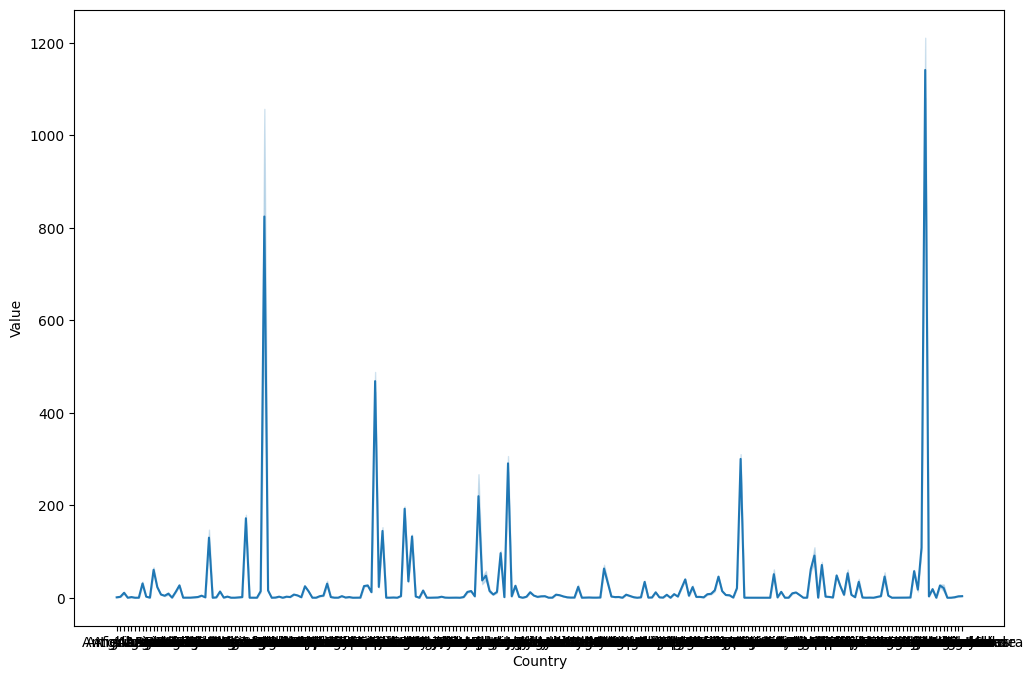

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(data=short,x='Country',y='Value')
plt.show()

In [23]:
df

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Trinidad and Tobago,distribution losses,Central & South America,0.244,0.21,0.152,0.326,0.36,0.407,0.337,...,0.239,0.234,0.245,0.248,0.253,0.274864,0.425807,0.424101,0.422757,0.422757
1606,Turks and Caicos Islands,distribution losses,Central & South America,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0,0,0,0,0,0.014,0.0125,0.0125,0.0125,0.01277172
1607,U.S. Virgin Islands,distribution losses,Central & South America,0.05243,0.05537,0.05607,0.05761,0.05789,0.05922,0.06055,...,0.063,0.06,0.06,0.06,0.065,0.065,0.05,0.051,0.051,0.051
1608,Uruguay,distribution losses,Central & South America,0.55,0.426,0.627,0.662,0.78,0.702,0.911,...,1.292,1.282,1.253,1.49,1.608,1.694491,1.557257,1.322331,1.129273,1.129273


In [26]:
df.columns

Index(['Country', 'Features', 'Region', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [28]:
df['Region'].value_counts()

Region
Africa                     399
Asia & Oceania             343
Europe                     315
Central & South America    315
Middle East                 98
Eurasia                     91
North America               49
Name: count, dtype: int64

In [29]:
table

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
1,Angola,net generation,Africa,1980,0.905000
2,Benin,net generation,Africa,1980,0.005000
3,Botswana,net generation,Africa,1980,0.443000
4,Burkina Faso,net generation,Africa,1980,0.098000
...,...,...,...,...,...
67615,Trinidad and Tobago,distribution losses,Central & South America,2021,0.422757
67616,Turks and Caicos Islands,distribution losses,Central & South America,2021,0.012772
67617,U.S. Virgin Islands,distribution losses,Central & South America,2021,0.051000
67618,Uruguay,distribution losses,Central & South America,2021,1.129273


In [31]:
africa_data = table[table['Region'].str.strip() == 'Africa']
africa_data

,Country,Features,Region,Year,Value
0,Algeria,net generation,Africa,1980,6.683000
1,Angola,net generation,Africa,1980,0.905000
2,Benin,net generation,Africa,1980,0.005000
3,Botswana,net generation,Africa,1980,0.443000
4,Burkina Faso,net generation,Africa,1980,0.098000
...,...,...,...,...,...
67442,Tunisia,distribution losses,Africa,2021,3.864714
67443,Uganda,distribution losses,Africa,2021,1.126898
67444,Western Sahara,distribution losses,Africa,2021,0.000000
67445,Zambia,distribution losses,Africa,2021,2.195103


In [32]:
africa_data = africa_data.groupby(['Region','Year'],)[['Value']].mean()
africa_data

Value
Region Year          
Africa 1980  1.144820
       1981  1.219538
       1982  1.260846
       1983  1.310995
       1984  1.424771
       1985  1.520034
       1986  1.606694
       1987  1.667248
       1988  1.725915
       1989  1.792865
       1990  1.837655
       1991  1.886293
       1992  1.906664
       1993  1.974955
       1994  2.006082
       1995  2.074238
       1996  2.146304
       1997  2.251389
       1998  2.270853
       1999  2.381974
       2000  2.522722
       2001  2.618570
       2002  2.762061
       2003  2.885886
       2004  3.058636
       2005  3.182179
       2006  3.332560
       2007  3.477465
       2008  3.533095
       2009  3.586843
       2010  3.948152
       2011  4.014051
       2012  4.122922
       2013  4.231762
       2014  4.383048
       2015  4.508484
       2016  4.585934
       2017  4.776495
       2018  4.893212
       2019  4.956990
       2020  4.899557
       2021  5.076511

In [34]:
europe_data = table[table['Region'].str.strip() == 'Europe']
europe_data

,Country,Features,Region,Year,Value
70,Albania,net generation,Europe,1980,3.635000
71,Austria,net generation,Europe,1980,40.574000
72,Belgium,net generation,Europe,1980,50.572000
73,Bosnia and Herzegovina,net generation,Europe,1980,NaN
74,Bulgaria,net generation,Europe,1980,32.854000
...,...,...,...,...,...
67500,Spain,distribution losses,Europe,2021,26.308922
67501,Sweden,distribution losses,Europe,2021,8.942000
67502,Switzerland,distribution losses,Europe,2021,4.466694
67503,Turkiye,distribution losses,Europe,2021,30.990369


In [35]:
europe_data = europe_data.groupby(['Region','Year'],)[['Value']].mean()
europe_data

Value
Region Year           
Europe 1980  23.398636
       1981  23.581290
       1982  23.751751
       1983  24.692023
       1984  25.889876
       1985  26.971940
       1986  27.520825
       1987  28.485438
       1988  29.186700
       1989  29.932611
       1990  30.174378
       1991  31.130029
       1992  25.643739
       1993  25.090517
       1994  25.395797
       1995  26.102009
       1996  27.016444
       1997  27.280623
       1998  27.812007
       1999  28.277105
       2000  29.531339
       2001  30.107986
       2002  30.579246
       2003  31.295258
       2004  31.924827
       2005  32.663953
       2006  32.267160
       2007  32.748078
       2008  32.171574
       2009  30.947254
       2010  32.515797
       2011  32.583795
       2012  32.975960
       2013  33.030024
       2014  32.554955
       2015  33.438093
       2016  33.701743
       2017  33.911320
       2018  33.883756
       2019  33.825739
       2020  33.485013
       2021  34.516464

In [36]:
asia_data = table[table['Region'].str.strip() == 'Asia & Oceania']
asia_data

,Country,Features,Region,Year,Value
115,Afghanistan,net generation,Asia & Oceania,1980,0.942000
116,American Samoa,net generation,Asia & Oceania,1980,0.070000
117,Australia,net generation,Asia & Oceania,1980,87.393000
118,Bangladesh,net generation,Asia & Oceania,1980,2.665000
119,Bhutan,net generation,Asia & Oceania,1980,0.016000
...,...,...,...,...,...
67549,Tuvalu,distribution losses,Asia & Oceania,2021,NaN
67550,U.S. Pacific Islands,distribution losses,Asia & Oceania,2021,0.035630
67551,Vanuatu,distribution losses,Asia & Oceania,2021,0.005700
67552,Vietnam,distribution losses,Asia & Oceania,2021,16.317286


In [37]:
asia_data = asia_data.groupby(['Region','Year'],)[['Value']].mean()
asia_data

Value
Region         Year           
Asia & Oceania 1980   9.092841
               1981   9.388189
               1982   9.810781
               1983  10.436508
               1984  11.164672
               1985  11.863501
               1986  12.513441
               1987  13.835951
               1988  14.899629
               1989  15.906396
               1990  16.984935
               1991  18.035079
               1992  19.004527
               1993  20.142898
               1994  21.852339
               1995  23.198936
               1996  24.294529
               1997  25.637963
               1998  26.475923
               1999  27.499144
               2000  29.230558
               2001  30.785037
               2002  32.658573
               2003  34.069844
               2004  37.086385
               2005  39.681531
               2006  43.179396
               2007  46.981100
               2008  48.556414
               2009  50.930108
               2010  56.155853
               2011  60.728109
               2012  63.711540
               2013  67.630369
               2014  70.651389
               2015  73.022143
               2016  77.069993
               2017  81.784216
               2018  86.252807
               2019  89.366415
               2020  91.754953
               2021  98.201565

In [38]:
north_data = table[table['Region'].str.strip() == 'North America']
north_data

,Country,Features,Region,Year,Value
178,Bermuda,net generation,North America,1980,0.311000
179,Canada,net generation,North America,1980,367.797000
180,Greenland,net generation,North America,1980,0.151000
181,Mexico,net generation,North America,1980,63.653000
182,Saint Pierre and Miquelon,net generation,North America,1980,0.016000
...,...,...,...,...,...
67570,Greenland,distribution losses,North America,2021,0.017000
67571,Mexico,distribution losses,North America,2021,38.420159
67572,Saint Pierre and Miquelon,distribution losses,North America,2021,0.001285
67573,U.S. Territories,distribution losses,North America,2021,NaN


In [39]:
north_data = north_data.groupby(['Region','Year'],)[['Value']].mean()
north_data

Value
Region        Year            
North America 1980  146.957953
              1981  149.594411
              1982  147.752057
              1983  152.368671
              1984  159.600137
              1985  164.160949
              1986  165.788736
              1987  172.276933
              1988  178.621079
              1989  191.777425
              1990  194.521895
              1991  197.403871
              1992  199.178712
              1993  205.845288
              1994  210.820446
              1995  216.398878
              1996  221.984188
              1997  225.072286
              1998  230.782855
              1999  236.081148
              2000  244.275320
              2001  241.363323
              2002  249.272195
              2003  251.101210
              2004  257.146065
              2005  263.605840
              2006  264.088037
              2007  270.295746
              2008  269.674389
              2009  260.646689
              2010  269.350145
              2011  270.914546
              2012  269.378916
              2013  272.174431
              2014  274.106738
              2015  274.528473
              2016  275.523736
              2017  273.925186
              2018  282.344377
              2019  279.407260
              2020  274.940146
              2021  281.652624

In [41]:
middle_data = table[table['Region'].str.strip() == 'Middle East']
middle_data

,Country,Features,Region,Year,Value
164,Bahrain,net generation,Middle East,1980,1.554000
165,Iran,net generation,Middle East,1980,21.256000
166,Iraq,net generation,Middle East,1980,10.736000
167,Israel,net generation,Middle East,1980,11.731000
168,Jordan,net generation,Middle East,1980,1.002000
...,...,...,...,...,...
67563,Qatar,distribution losses,Middle East,2021,2.885429
67564,Saudi Arabia,distribution losses,Middle East,2021,37.349071
67565,Syria,distribution losses,Middle East,2021,3.700000
67566,United Arab Emirates,distribution losses,Middle East,2021,6.989000


In [42]:
middle_data = middle_data.groupby(['Region','Year'],)[['Value']].mean()
middle_data

Value
Region      Year           
Middle East 1980   2.368187
            1981   2.686132
            1982   3.172725
            1983   3.546747
            1984   3.934154
            1985   4.213462
            1986   4.436560
            1987   4.689934
            1988   5.259505
            1989   5.555538
            1990   5.739033
            1991   5.684143
            1992   6.280418
            1993   6.851725
            1994   7.461187
            1995   7.955868
            1996   8.402868
            1997   8.316755
            1998   8.980816
            1999   9.347960
            2000  10.275136
            2001  10.860031
            2002  11.584055
            2003  12.301484
            2004  13.070087
            2005  14.045585
            2006  15.157006
            2007  16.062980
            2008  17.123298
            2009  18.186587
            2010  19.638999
            2011  20.398131
            2012  21.737978
            2013  22.907332
            2014  24.418407
            2015  25.659320
            2016  26.438892
            2017  27.497850
            2018  28.163243
            2019  29.234441
            2020  28.247585
            2021  29.693613

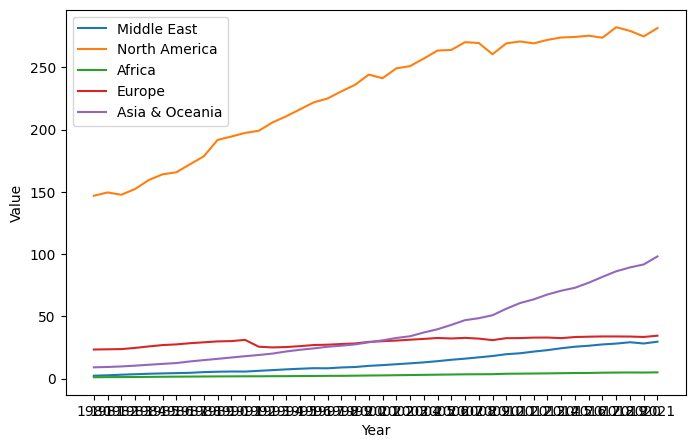

In [43]:
plt.figure(figsize=(8,5))
sns.lineplot(data=middle_data,x='Year',y='Value',label='Middle East')
sns.lineplot(data=north_data,x='Year',y='Value',label='North America')
sns.lineplot(data=africa_data,x='Year',y='Value',label='Africa')
sns.lineplot(data=europe_data,x='Year',y='Value',label='Europe')
sns.lineplot(data=asia_data,x='Year',y='Value',label='Asia & Oceania')
plt.legend()
plt.show()

In [45]:
short2 = table.groupby(['Region','Year'],)[['Value']].mean()
short2

Value
Region        Year            
Africa        1980    1.144820
              1981    1.219538
              1982    1.260846
              1983    1.310995
              1984    1.424771
...                        ...
North America 2017  273.925186
              2018  282.344377
              2019  279.407260
              2020  274.940146
              2021  281.652624

[294 rows x 1 columns]

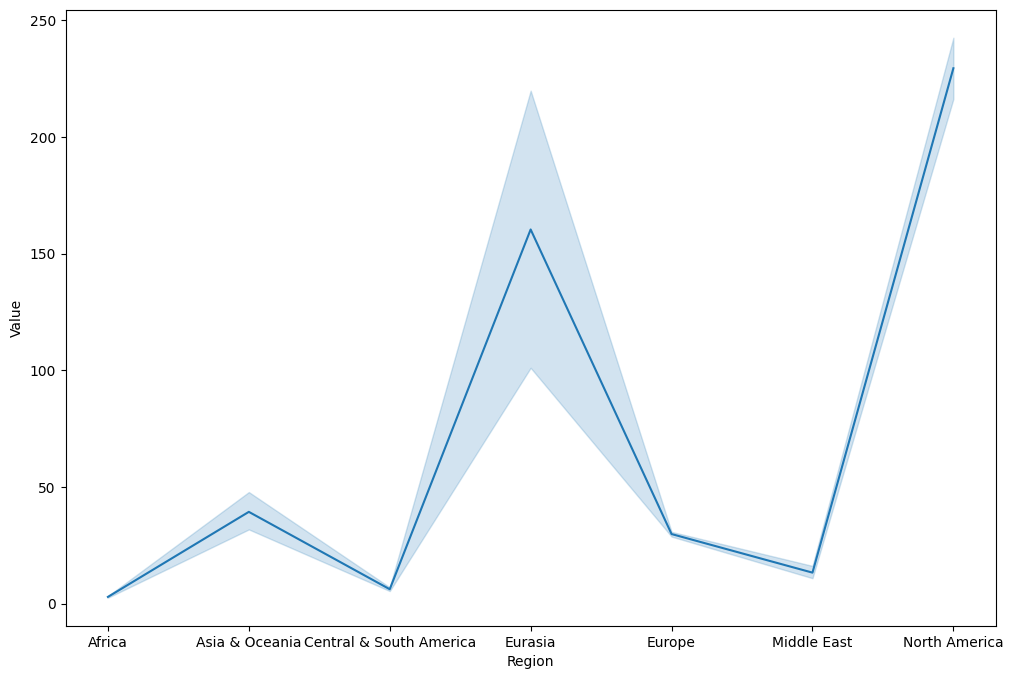

In [47]:
plt.figure(figsize=(12,8))
sns.lineplot(data=short2,x='Region',y='Value')
plt.show()